In [143]:
import pickle
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt 

In [144]:
with open(r"..\pipeline.pkl", 'rb') as f:
    pipeline = pickle.load(f)

In [145]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_features='log2',
                                        min_samples_split=5, n_estimators=50,
                                        random_state=42))])

In [146]:
model = pipeline["model"]
scaler = pipeline["scaler"]

In [147]:
import pandas as pd

In [148]:
X_train = pd.read_csv("X_train")
X_test = pd.read_csv("X_test")
y_train = pd.read_csv("y_train")
y_test = pd.read_csv("y_test")

In [149]:
X_train = X_train.drop('Unnamed: 0', axis=1)
X_test = X_test.drop('Unnamed: 0', axis=1)
y_train = y_train.drop('Unnamed: 0', axis=1)
y_test = y_test.drop('Unnamed: 0', axis=1)

In [150]:
y_test.value_counts()

Polarity
1           492
0           459
Name: count, dtype: int64

In [151]:
X_test.columns

Index(['t_syll3', 'root_propn_var', 'root_space_var', 'corr_punct_var',
       'uber_ttr_no_lem', 'a_propn_ps', 'smog'],
      dtype='object')

In [152]:
X_test

,t_syll3,root_propn_var,root_space_var,corr_punct_var,uber_ttr_no_lem,a_propn_ps,smog
0,94,6.92,0.37,0.45,47.64,1.60,7.68
1,19,5.98,0.76,0.69,43.60,6.50,6.23
2,211,6.48,0.00,0.46,35.91,1.87,7.28
3,11,3.23,0.50,1.11,62.67,2.82,5.71
4,14,4.73,0.32,0.53,47.06,3.07,5.71
...,...,...,...,...,...,...,...
946,12,4.02,0.30,0.71,42.83,0.69,3.67
947,6,3.32,1.00,0.50,140.35,5.50,9.89
948,85,9.77,0.49,0.53,49.35,3.16,5.14
949,148,9.84,0.20,0.50,46.50,2.72,6.75


In [153]:
X_test.shape

(951, 7)

In [154]:
X_test = scaler.transform(X_test)

In [155]:
cols = ['total_number_of_words_more_than_three_syllables',
        'root_proper_nouns_variation',
        'root_spaces_variation',
        'corrected_punctuations_variation',
        'uber_type_token_ratio_no_lemma',
        'average_number_of_proper_nouns_per_sentence',
        'smog_index']

In [156]:
X_test = pd.DataFrame(X_test, columns=cols)

In [157]:
import shap

In [158]:
shap.initjs()

In [159]:
predictions = model.predict(X_test)
predictions[0]

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


1

In [160]:
model_prob = model.predict_proba(X_test)
model_prob[0]

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0.45633333, 0.54366667])

In [161]:
rf_explainer = shap.TreeExplainer(model, model_output="raw")
shap_values = rf_explainer(X_test)

In [162]:
import numpy as np

In [163]:
np.shape(shap_values.values)

(951, 7, 2)

In [164]:
X_test.shape

(951, 7)

In [165]:
X_test.shape[1:]

(7,)

Model explanation

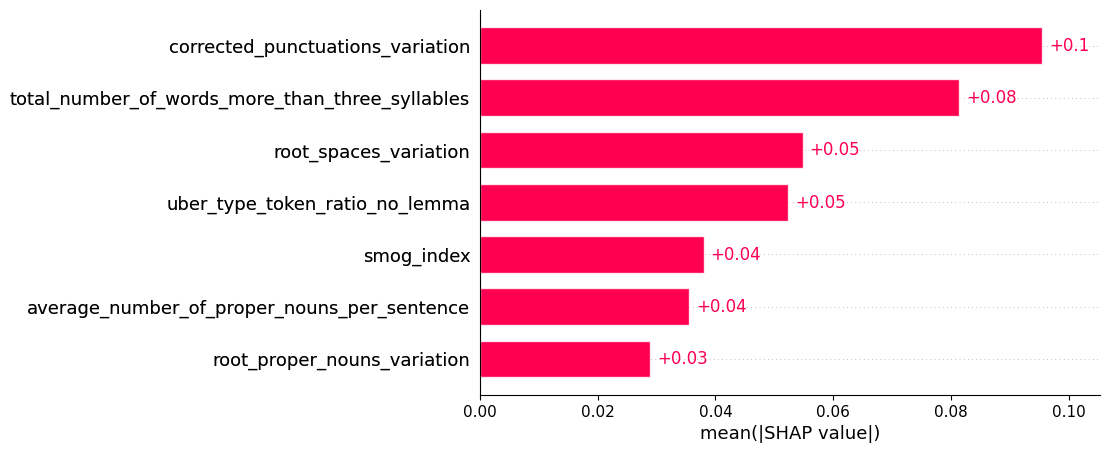

In [166]:
shap.plots.bar(shap_values[:, :, 1])

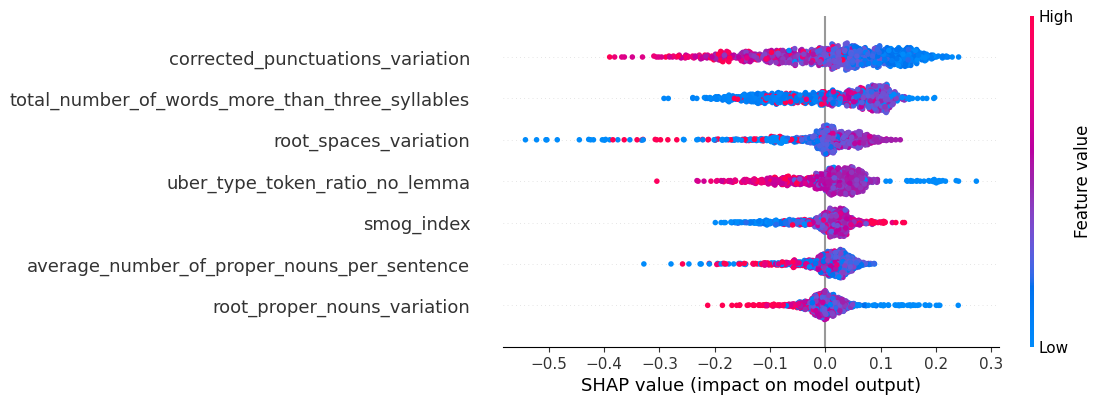

In [167]:
shap.plots.beeswarm(shap_values[:, :, 1])

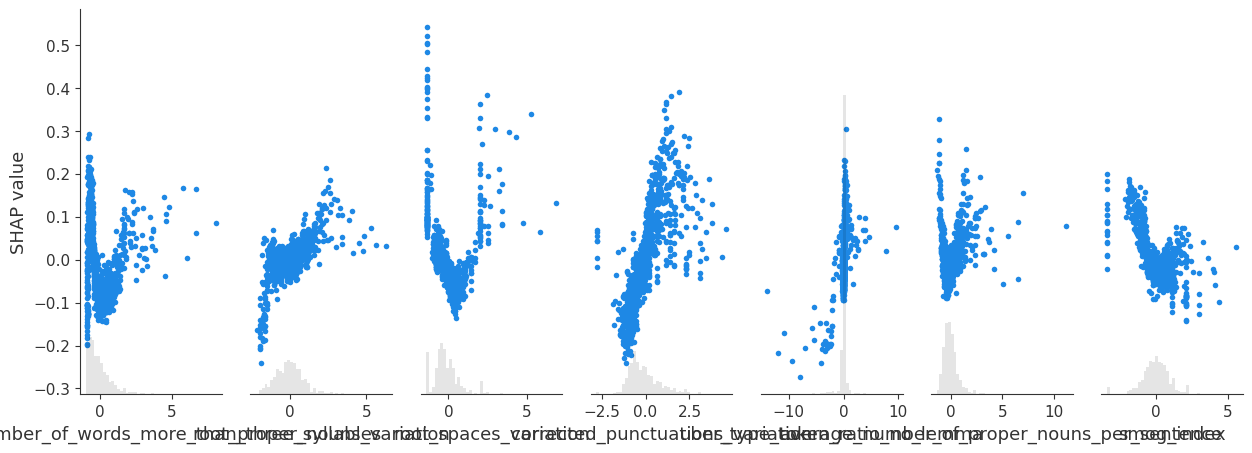

In [188]:
shap.plots.scatter(shap_values[:, :, 0])

Individual Explanations

Dimension of the shap values array is number of samples, number of features and number of possible outcomes (True/False)

In [168]:
shap_values[0,:, 1]

.values =
array([ 0.04651419, -0.03686022,  0.04076859,  0.10633643, -0.06892543,
       -0.03624842, -0.00613913])

.base_values =
0.49822065378900454

.data =
array([ 1.12359878,  1.10762506, -0.10062034, -0.89501845,  0.07767256,
       -0.68173929,  0.91065456])

In [169]:
type(shap_values[0,:, 1])

shap._explanation.Explanation

In [170]:
shap_values[0,:, 1].values

array([ 0.04651419, -0.03686022,  0.04076859,  0.10633643, -0.06892543,
       -0.03624842, -0.00613913])

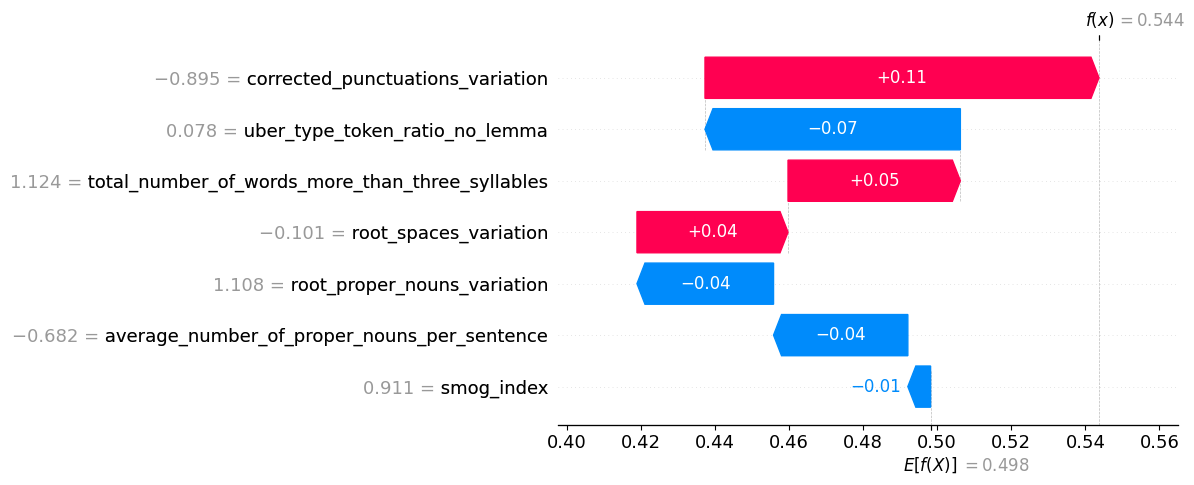

In [171]:
shap.plots.waterfall(shap_values[0,:, 1]) # first example in the test set, all the features for the first possible outcome(fake)

In [172]:
shap_values_list = list(shap_values[:, :, 1].values)

In [173]:
expected_values_list = list(shap_values[:, :, 1].base_values)

In [174]:
shap.plots.force(shap_values[0, :, 1])